중복 이슈, basline?

### Data Loading

In [3]:
base = 'c:/Users/JCY/Dacon/shinhan/'

(26457, 20) (10000, 19) (36457, 19)


In [197]:
def get_data(base, imp=True):
    import os
    from copy import deepcopy
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    from sklearn.preprocessing import StandardScaler
    
    
    
    train_df = pd.read_csv(os.path.join(base, 'data/train.csv'))
    test_df = pd.read_csv(os.path.join(base, 'data/test.csv'))
    train_df_target_removed = train_df.drop(columns=['credit'])
    train_df_target = train_df.iloc[:, -1]

    df = pd.concat([train_df_target_removed, test_df], axis=0)
    print('Shape: train {} test {} total {}'.format(train_df.shape, test_df.shape, df.shape))
    
    def birth2age(x):
        return x*(-1) / 365
    df['age'] = df['DAYS_BIRTH'].apply(birth2age)
    df['skill'] = df['DAYS_EMPLOYED'].apply(birth2age)
    df['month'] = df['begin_month'].apply(lambda x: x * (-1))

    df['income_c'] = ''
    df.loc[df['income_total'] <= 1.575e6, 'income_c'] = 'first'
    df.loc[df['income_total'] <= 2.25e5, 'income_c'] ='second'
    df.loc[df['income_total'] <= 1.575e5, 'income_c'] = 'third'
    df.loc[df['income_total'] <= 1.215e5, 'income_c'] = 'fourth'

    if imp:
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Commercial associate') &\
               (df['gender'] == 'F'), 'occyp_type'] = 'Sales staff'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Commercial associate') &\
               (df['gender'] == 'F') &\
               (df['income_c'] == 'first'), 'occyp_type'] = 'Managers'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Commercial associate') &\
               (df['gender'] == 'F') &\
               (df['income_c'] == 'third') &\
               (df['work_phone'] == 1), 'occyp_type'] = 'Core staff'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Commercial associate') &\
               (df['gender'] == 'M'), 'occyp_type'] = 'Drivers'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Commercial associate') &\
               (df['gender'] == 'M') &\
               (df['income_c'] == 'first'), 'occyp_type'] = 'Managers'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Commercial associate') &\
               (df['gender'] == 'M') &\
               (df['income_c'] == 'fourth') &\
               (df['work_phone'] == 0), 'occyp_type'] = 'Laborers'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Commercial associate') &\
               (df['gender'] == 'M') &\
               (df['income_c'] == 'fourth') &\
               (df['work_phone'] == 1), 'occyp_type'] = 'Drivers'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Pensioner') &\
               (df['gender'] == 'F') &\
               (df['income_c'] == 'first') &\
               (df['work_phone'] == 0), 'occyp_type'] = 'Core staff'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'State servant'), 'occyp_type'] = 'Core staff'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'State servant') &\
               (df['gender'] == 'F') &\
               (df['income_c'] == 'first') &\
               (df['work_phone'] == 1), 'occyp_type'] = 'Managers'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'State servant') &\
               (df['gender'] == 'F') &\
               (df['income_c'] == 'second') &\
               (df['work_phone'] == 0), 'occyp_type'] = 'Medicine staff'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'State servant') &\
               (df['gender'] == 'M') &\
               (df['income_c'] == 'first') &\
               (df['work_phone'] == 1), 'occyp_type'] = 'High skill tech staff'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'State servant') &\
               (df['gender'] == 'M') &\
               (df['income_c'] == 'fouth') &\
               (df['work_phone'] == 0), 'occyp_type'] = 'Laborers'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'State servant') &\
               (df['gender'] == 'M') &\
               (df['income_c'] == 'third') &\
               (df['work_phone'] == 1), 'occyp_type'] = 'Drivers'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Working'), 'occyp_type'] = 'Laborers'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Working') &\
               (df['gender'] == 'F'), 'occyp_type'] = 'Sales staff'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'State servant') &\
               (df['gender'] == 'F') &\
               (df['income_c'] == 'first') &\
               (df['work_phone'] == 1), 'occyp_type'] = 'Managers'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'State servant') &\
               (df['gender'] == 'F') &\
               (df['income_c'] == 'second') &\
               (df['work_phone'] == 1), 'occyp_type'] = 'Core staff'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Student') &\
               (df['income_c'] == 'fourth'), 'occyp_type'] = 'Laborers'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Student') &\
               (df['income_c'] == 'second'), 'occyp_type'] = 'Core staff'
        df.loc[df['occyp_type'].isnull() &\
               (df['income_type'] == 'Pensioner'), 'occyp_type'] = 'Laborers'
    else:
        df.drop(columns=['occyp_type'], inplace=True)
        
    df.drop(columns=['begin_month', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'income_c'], inplace=True)

    # encoding
    le_gender = LabelEncoder()
    le_car = LabelEncoder()
    le_reality = LabelEncoder()
    le_income_type = LabelEncoder()
    le_edu_type = LabelEncoder()
    le_family_type = LabelEncoder()
    le_house_type = LabelEncoder()

    le_occyp_type = LabelEncoder()
    le_income_c = LabelEncoder()

    new_df = deepcopy(df)
    
    new_df.gender = le_gender.fit_transform(new_df.gender)
    new_df.car = le_car.fit_transform(new_df.car)
    new_df.reality = le_reality.fit_transform(new_df.reality)
    new_df.income_type = le_income_type.fit_transform(new_df.income_type)
    new_df.edu_type = le_edu_type.fit_transform(new_df.edu_type)
    new_df.family_type = le_family_type.fit_transform(new_df.family_type)
    new_df.house_type = le_house_type.fit_transform(new_df.house_type)

    if imp:
        new_df.occyp_type = le_occyp_type.fit_transform(new_df.occyp_type)

    # scaling
    ss_income_total = StandardScaler()
    ss_days_birth = StandardScaler()
    ss_days_employed = StandardScaler()
    ss_begin_month = StandardScaler()

    new_df.income_total = ss_income_total.fit_transform(np.array(new_df.income_total).reshape(-1, 1))
    new_df.age = ss_days_birth.fit_transform(np.array(new_df.age).reshape(-1, 1))
    new_df.skill = ss_days_employed.fit_transform(np.array(new_df.skill).reshape(-1, 1))
    new_df.month = ss_begin_month.fit_transform(np.array(new_df.month).reshape(-1, 1))
    
    train_df = new_df[:26457]
    test_df = new_df[26457:]

#     train_df = pd.concat([train_df, train_df_target], axis=1)
    
    return train_df, test_df, new_df

In [113]:
train_df, test_df = get_data(base, imp=True)

Shape: train (26457, 20) test (10000, 19) total (36457, 19)


In [114]:
train_df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,age,skill,month
0,0,0,0,0,0,0.155365,0,1,1,2,1,0,0,0,14,2.0,-0.494269,0.464745,-1.221952
1,1,0,0,1,1,0.597461,0,4,0,1,1,0,0,1,8,3.0,-1.093961,0.441723,-1.282552
2,2,1,1,1,0,2.586893,4,1,1,1,1,0,1,0,10,2.0,0.740824,0.462747,-0.252350
3,3,0,0,1,0,0.155365,0,4,1,1,1,0,1,0,14,2.0,-0.211207,0.445733,0.656651
4,4,0,1,1,0,-0.286731,2,1,1,1,1,0,0,0,10,2.0,-0.223348,0.445828,-0.009950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0.376413,2,4,1,1,1,0,0,0,3,4.0,-0.927552,0.444949,-1.464352
26453,26453,0,0,1,1,-0.065683,4,1,2,1,1,0,0,0,8,2.0,-0.162879,0.448516,1.262652
26454,26454,0,1,0,0,1.039557,4,4,0,5,1,0,0,0,3,2.0,-1.402972,0.445174,-0.070550
26455,26455,1,0,1,0,-0.154102,4,2,3,1,1,0,0,0,8,1.0,-1.387974,0.431313,1.989853


In [90]:
test_df.values[:, 1:].shape

(10000, 18)

In [32]:
pd.pivot_table(
    df.groupby(['income_type', 'occyp_type', 'gender', 'income_c', 'work_phone']).size().reset_index(name='cnt'), 
    columns=['income_type', 'gender', 'income_c', 'work_phone'], index='occyp_type', values='cnt').\
    style.background_gradient(cmap='Blues')

In [44]:
df.loc[df['occyp_type'].isnull() & (df['income_type'] == 'Commercial associate') & (df['gender'] == 'F'), 'occyp_type'] = 'Sales staff'
df.loc[df['occyp_type'].isnull() & (df['income_type'] == 'Commercial associate') & (df['gender'] == 'M'), 'occyp_type'] = 'Laborers'
df.loc[df['occyp_type'].isnull() & (df['income_type'] == 'Pensioner'), 'occyp_type'] = 'Core staff'
df.loc[df['occyp_type'].isnull() & (df['income_type'] == 'State servant'), 'occyp_type'] = 'Core staff'
df.loc[df['occyp_type'].isnull() & (df['income_type'] == 'Student') & (df['gender'] == 'F'), 'occyp_type'] = 'Core staff'
df.loc[df['occyp_type'].isnull() & (df['income_type'] == 'Working') & (df['gender'] == 'F'), 'occyp_type'] = 'Sales staff'
df.loc[df['occyp_type'].isnull() & (df['income_type'] == 'Working') & (df['gender'] == 'M'), 'occyp_type'] = 'Laborers'

### Preprocessing

In [41]:
# ### feature engineering
# from sklearn.decomposition import PCA

# # contact
# pca = PCA(n_components=1)
# result = pca.fit_transform(new_df[['phone', 'work_phone', 'email', 'FLAG_MOBIL']])
# new_df['contact_score'] = result
# new_df['contact_sum'] = new_df[['phone', 'work_phone', 'email', 'FLAG_MOBIL']].sum(axis=1)

# begin month
# new_df['begin_month_i'] = 0
# new_df.loc[new_df['begin_month'] > -60, 'begin_month_i'] = 5
# new_df.loc[new_df['begin_month'] > -48, 'begin_month_i'] = 4
# new_df.loc[new_df['begin_month'] > -36, 'begin_month_i'] = 3
# new_df.loc[new_df['begin_month'] > -24, 'begin_month_i'] = 2
# new_df.loc[new_df['begin_month'] > -12, 'begin_month_i'] = 1

# # family_size
# new_df['family_size_i'] = new_df['family_size']
# new_df.loc[new_df['family_size'] >= 5, 'family_size_i'] = 5
# new_df.loc[new_df['family_size'] >= 9, 'family_size_i'] = 6

# new_df['adult_num'] = new_df['family_size'] - new_df['child_num']

# new_df['asset'] = new_df['car'].map({'Y':1, 'N':0}) + new_df['reality'].map({'Y':2, 'N':0})

# def edu_disc(x):
#     if x == 'Academic degree' or x == 'Higher education':
#         return 1
#     else:
#         return 0
    
# new_df['edu_level'] = new_df.edu_type.apply(edu_disc)

### Workspace

In [238]:
imp=True

In [266]:
train_df, test_df, new_df = get_data(base, imp=imp)

Shape: train (26457, 20) test (10000, 19) total (36457, 19)


In [267]:
### normal
train_df = pd.concat([train_df, train_df_target], axis=1)

In [265]:
### pca
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
encode = pca.fit_transform(new_df[['gender', 'car', 'reality', \
                         'FLAG_MOBIL', 'work_phone', 'phone', 'email']].values)

train_df.drop(columns=['gender', 'car', 'reality', \
                        'FLAG_MOBIL', 'work_phone', 'phone', 'email'],
             inplace=True)
test_df.drop(columns=['gender', 'car', 'reality', \
                        'FLAG_MOBIL', 'work_phone', 'phone', 'email'],
            inplace=True)

train_df_enc = pd.concat([train_df.reset_index(drop=True), pd.DataFrame(encode[:26457]), train_df_target], axis=1)
test_df_enc = pd.concat([test_df.reset_index(drop=True), pd.DataFrame(encode[26457:])], axis=1)

train_df = train_df_enc
test_df = test_df_enc

In [240]:
### AE
encode = pd.read_csv('data/encode_result.csv')
train_df.drop(columns=['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', \
                        'house_type', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type'],
             inplace=True)
test_df.drop(columns=['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', \
                        'house_type', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type'],
            inplace=True)

train_df_enc = pd.concat([train_df.reset_index(drop=True), encode[:26457].reset_index(drop=True), train_df_target], axis=1)
test_df_enc = pd.concat([test_df.reset_index(drop=True), encode[26457:].reset_index(drop=True)], axis=1)

train_df = train_df_enc
test_df = test_df_enc

In [268]:
train_df_selected = train_df.drop(columns=['index', 'credit'])
train_df_target = train_df.iloc[:, -1]
columns_list = train_df_selected.columns

# train_df_selected = train_df[['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]

X = np.asarray(train_df_selected).astype(np.float32)
y = np.asarray(train_df_target).astype(np.float32)

In [283]:
train_df_selected
print(len([0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13]),\
len([2, 2, 2, 5, 5, 5, 6, 2, 2, 2, 2, 19]))

12 12


In [282]:
len(np.unique(train_df_selected['occyp_type']))

19

In [248]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X_bal, y_bal = X, y

test_rf = RandomForestClassifier()

test_rf.fit(X_bal, y_bal)
len(test_rf.feature_importances_)

cv_score = cross_val_score(test_rf, X, y, scoring='neg_log_loss', cv=10, n_jobs=-1)

print('cv score : {}'.format(cv_score))
print('mean : {}'.format(cv_score.mean()))
print('var : {}'.format(cv_score.var()))

cv score : [-0.93899054 -0.95918729 -0.99572583 -0.91072727 -0.98937367 -1.10844628
 -0.91743534 -1.05470621 -1.00441963 -1.00097231]
mean : -0.9879984372341115
var : 0.0033639032779118165


In [269]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
train_y_enc = OneHotEncoder().fit_transform(train_y.reshape(-1, 1))
test_y_enc = OneHotEncoder().fit_transform(test_y.reshape(-1, 1))

In [273]:
train_df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,age,skill,month,credit
0,0,0,0,0,0,0.155365,0,1,1,2,1,0,0,0,14,2.0,-0.494269,0.464745,-1.221952,1.0
1,1,0,0,1,1,0.597461,0,4,0,1,1,0,0,1,8,3.0,-1.093961,0.441723,-1.282552,1.0
2,2,1,1,1,0,2.586893,4,1,1,1,1,0,1,0,10,2.0,0.740824,0.462747,-0.252350,2.0
3,3,0,0,1,0,0.155365,0,4,1,1,1,0,1,0,14,2.0,-0.211207,0.445733,0.656651,0.0
4,4,0,1,1,0,-0.286731,2,1,1,1,1,0,0,0,10,2.0,-0.223348,0.445828,-0.009950,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0.376413,2,4,1,1,1,0,0,0,3,4.0,-0.927552,0.444949,-1.464352,1.0
26453,26453,0,0,1,1,-0.065683,4,1,2,1,1,0,0,0,8,2.0,-0.162879,0.448516,1.262652,2.0
26454,26454,0,1,0,0,1.039557,4,4,0,5,1,0,0,0,3,2.0,-1.402972,0.445174,-0.070550,2.0
26455,26455,1,0,1,0,-0.154102,4,2,3,1,1,0,0,0,8,1.0,-1.387974,0.431313,1.989853,2.0


In [ ]:
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier

clf = TabNetMultiTaskClassifier(
    n_d=64, # the bigger, the more overfitted
    n_a=64, #shuold be equal to n_d
    n_steps=3, # 3 ~ 10
    gamma=1.3, # 1.0 ~ 2.0
    cat_idxs=[0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13], # category variable 
    cat_dims=[2, 2, 2, 5, 5, 5, 6, 2, 2, 2, 2, 19], # number of unique values for a categorical feature
    cat_emb_dim=3, # embedding size
    n_independent=2, # 1 ~ 5, Number of shared Gated Linear Units at each step
    n_shared=2, # 1 ~ 5
    momentum=0.02, # 0.01 ~ 0.4
    lambda_sparse=1e-3,
)
clf.fit(
  train_X, train_y_enc.toarray(),
  eval_set=[(test_X, test_y_enc.toarray())],
  drop_last=True,
  eval_metric=['logloss'],
  patience=10
)
y_hat = clf.predict(test_X)

Device used : cpu
epoch 0  | loss: 0.70277 | val_0_logloss: 0.53812 |  0:00:11s
epoch 1  | loss: 0.53183 | val_0_logloss: 0.51319 |  0:00:21s
epoch 2  | loss: 0.5162  | val_0_logloss: 0.50972 |  0:00:32s
epoch 3  | loss: 0.50885 | val_0_logloss: 0.49803 |  0:00:43s
epoch 4  | loss: 0.50211 | val_0_logloss: 0.49589 |  0:00:54s
epoch 5  | loss: 0.49944 | val_0_logloss: 0.49894 |  0:01:06s
epoch 6  | loss: 0.49619 | val_0_logloss: 0.49409 |  0:01:19s
epoch 7  | loss: 0.4945  | val_0_logloss: 0.49432 |  0:01:31s
epoch 8  | loss: 0.49309 | val_0_logloss: 0.49016 |  0:01:43s
epoch 9  | loss: 0.49319 | val_0_logloss: 0.49086 |  0:01:55s
epoch 10 | loss: 0.49355 | val_0_logloss: 0.49101 |  0:02:08s
epoch 11 | loss: 0.49005 | val_0_logloss: 0.48966 |  0:02:31s
epoch 12 | loss: 0.49092 | val_0_logloss: 0.49048 |  0:02:50s
epoch 13 | loss: 0.49035 | val_0_logloss: 0.4867  |  0:03:02s
epoch 14 | loss: 0.48846 | val_0_logloss: 0.48772 |  0:03:17s
epoch 15 | loss: 0.48711 | val_0_logloss: 0.48462 | 

### TabNet
- imb O
```
Early stopping occurred at epoch 61 with best_epoch = 51 and best_val_0_logloss = 0.48159
Best weights from best epoch are automatically used!
```
- imb X
```
Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_logloss = 0.48562
Best weights from best epoch are automatically used!
```
- n_d 16
```
Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_logloss = 0.48277
Best weights from best epoch are automatically used!
```
- n_d 32
```
Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_logloss = 0.48201
Best weights from best epoch are automatically used!
```
- n_d 64
```

```


- imp=True
```
cv score : [-0.8691132  -0.9285288  -0.9547066  -0.87351961 -0.91330591 -1.00871731
 -0.924453   -0.91787733 -0.90017997 -0.92935446]
mean : -0.9219756182261959
var : 0.001440839697791163
```
- imp=False
```
cv score : [-0.89111487 -0.89698078 -0.93533281 -0.88661441 -0.89700885 -1.05290952
 -0.94319139 -1.00897448 -0.89490496 -0.92219828]
mean : -0.9329230346789187
var : 0.002832630552132284
```
- ae
```
cv score : [-1.05130433 -1.1063895  -1.06385922 -1.02268056 -1.07865308 -1.16934547
 -1.1268215  -1.22974754 -1.11300431 -1.10274256]
mean : -1.106454804846715
var : 0.003227483812205975
```
- 5d pca
```
cv score : [-0.97544785 -0.96590639 -1.04689832 -0.98155165 -0.95807258 -1.15112757
 -0.94188099 -1.1602442  -0.95025512 -1.02807874]
mean : -1.0159463413114722
var : 0.005867856326433751
```

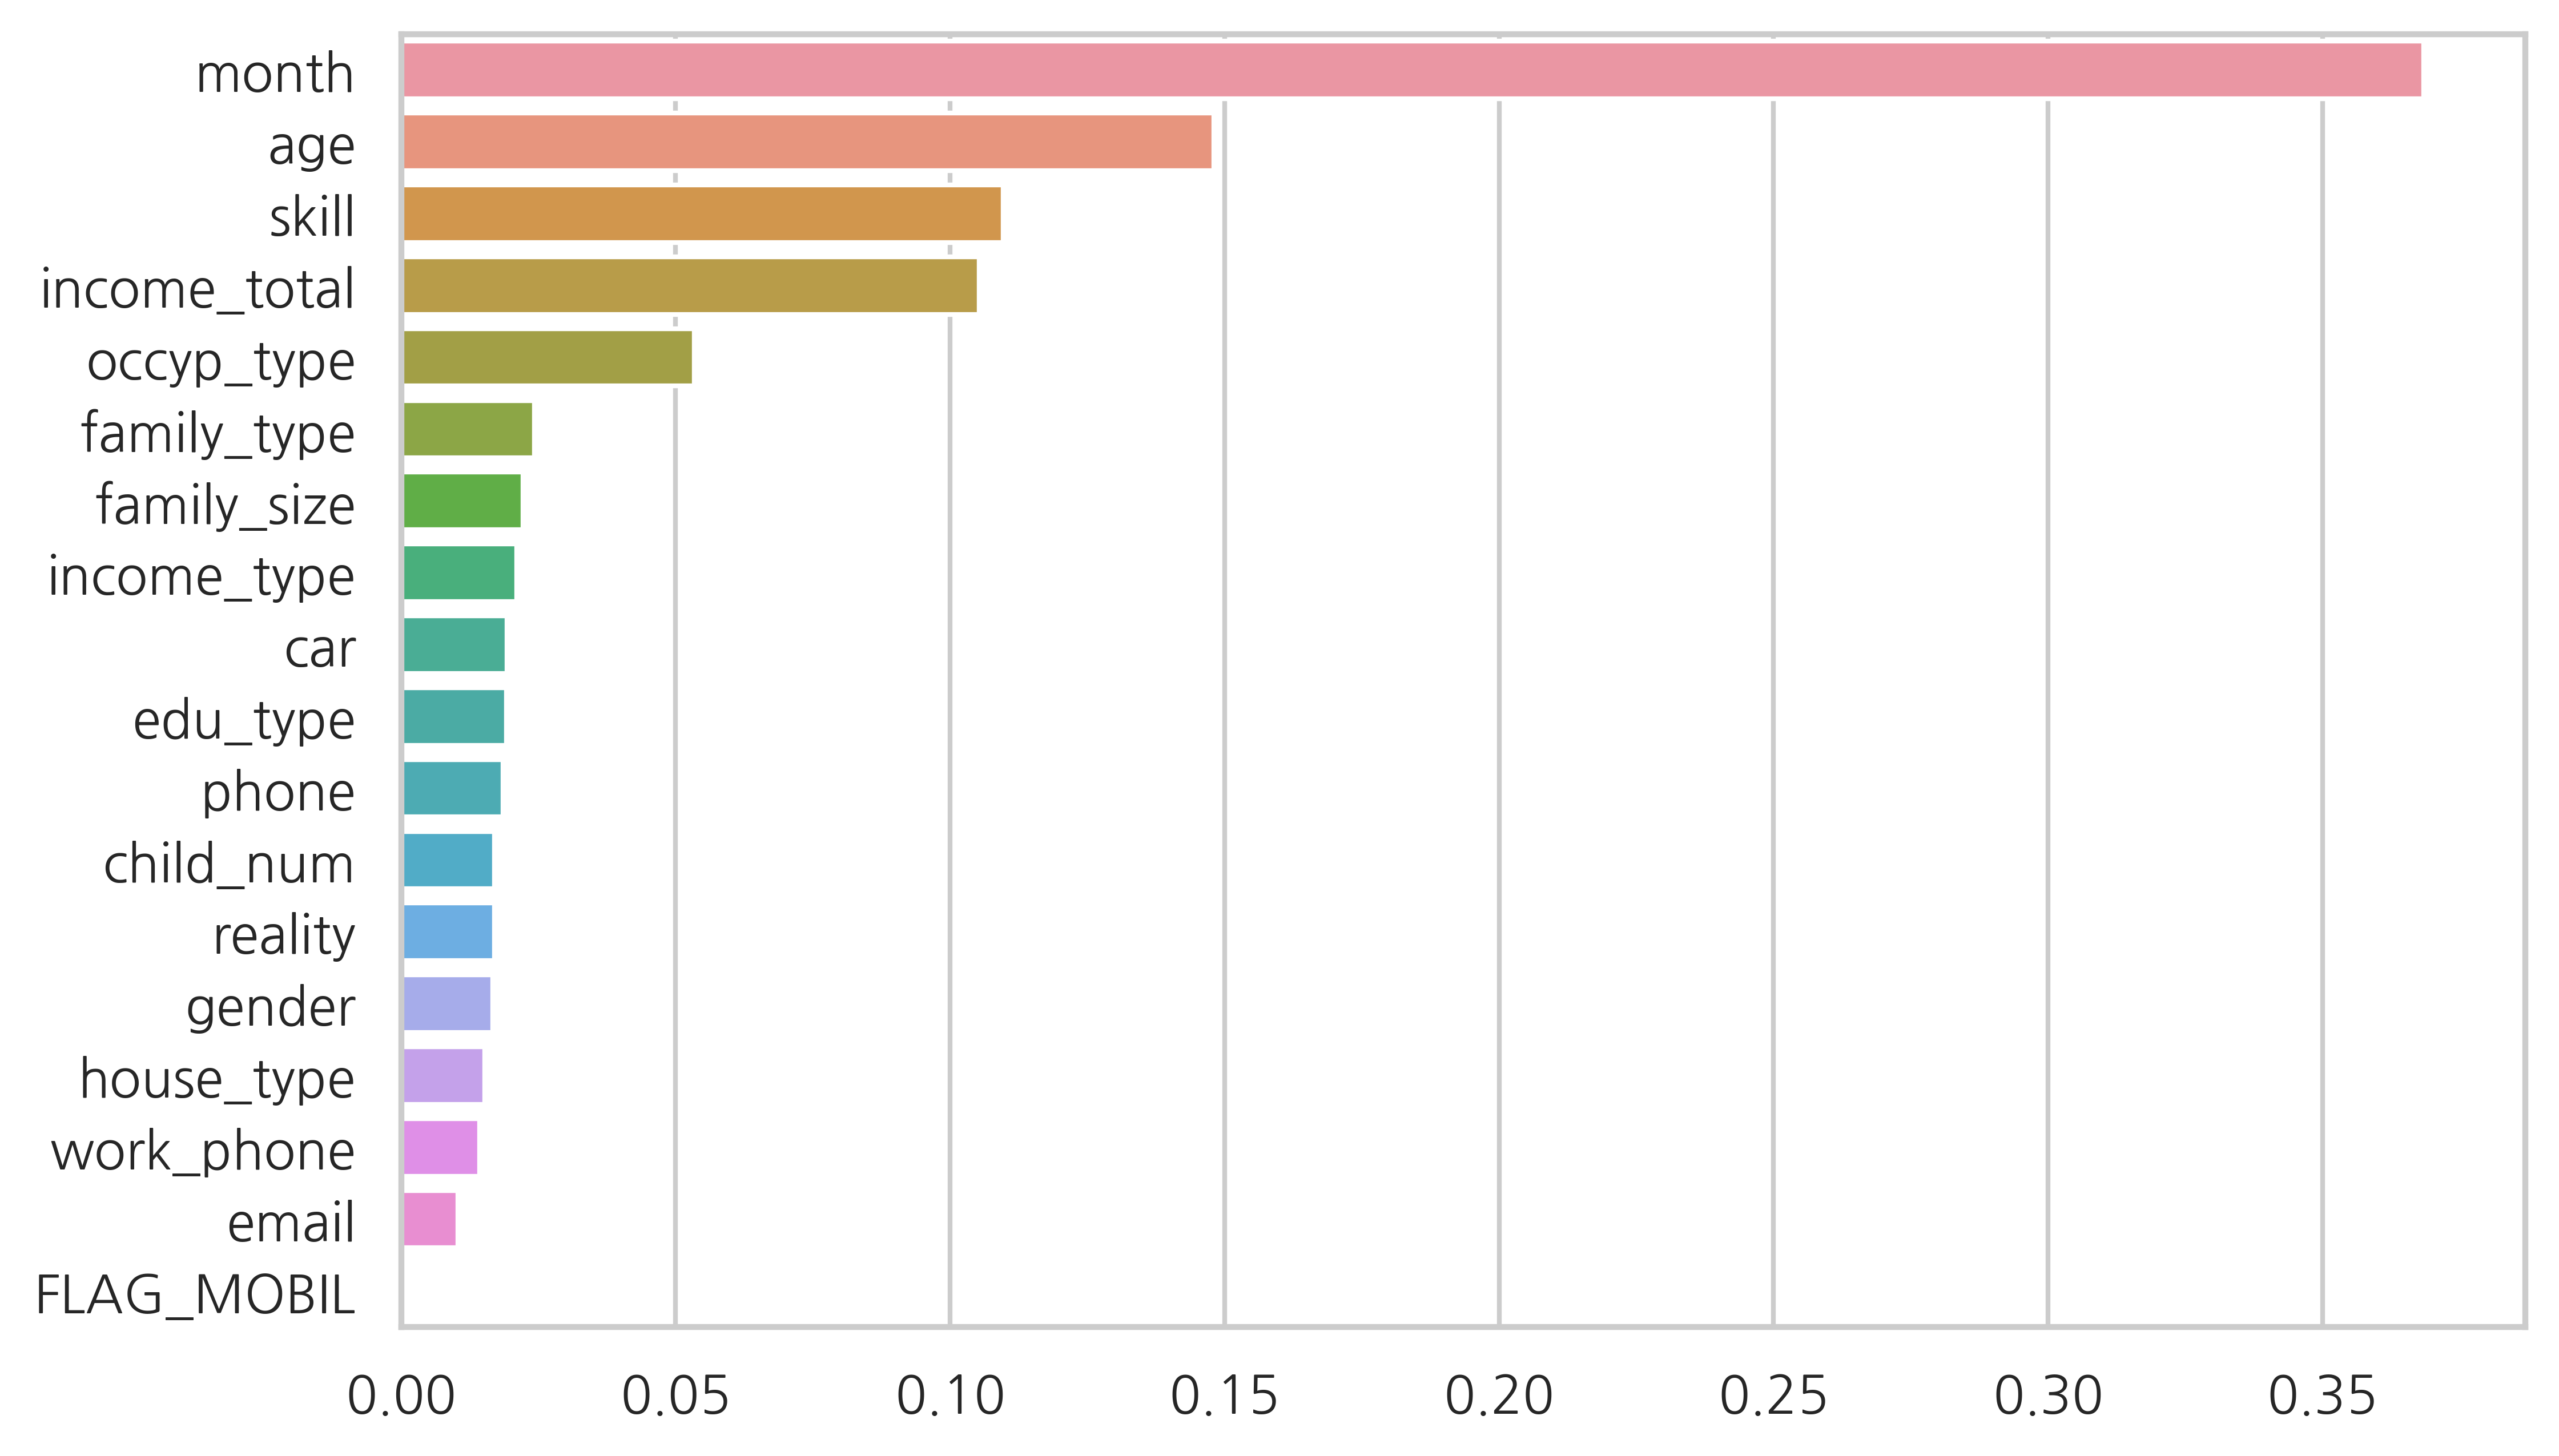

In [56]:
indices = test_rf.feature_importances_.argsort()[::-1]
sns.barplot(test_rf.feature_importances_[indices], train_df_selected.columns[indices])
plt.show()

In [57]:
def feature_selection(top_k=20, test_size=0.2): 
    mask = np.argsort(test_rf.feature_importances_)[::-1]
    topk = mask[:top_k]

    feature_names = columns_list[topk]

    train_df_selected = train_df[feature_names]
    train_df_target = train_df.iloc[:, -1]

    X = np.asarray(train_df_selected).astype(np.float32)
    y = np.asarray(train_df_target).astype(np.float32)

    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=test_size, random_state=0)
    
    return train_X, test_X, train_y, test_y, X, y

top_k = 999
train_X, test_X, train_y, test_y, X, y = feature_selection(top_k=top_k)

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss
from sklearn.model_selection import cross_val_score

# X_bal, y_bal = SMOTE().fit_resample(train_X, train_y)
X_bal, y_bal = train_X, train_y


rf = RandomForestClassifier(n_estimators=500,
                            criterion='entropy',
                            n_jobs=-1,
                            warm_start=True,
                            max_depth=20,
#                             min_samples_split=3,
#                             min_samples_leaf=2,
                           )

rf.fit(X_bal, y_bal)

y_hat = rf.predict(X_bal)
y_hat_prob = rf.predict_proba(X_bal)
print('train accuracy: {} loss: {}'.format(accuracy_score(y_bal, y_hat), log_loss(y_bal, y_hat_prob)))

y_hat_test = rf.predict(test_X)
y_hat_test_prob = rf.predict_proba(test_X)
print('test accuracy: {} loss: {}'.format(accuracy_score(test_y, y_hat_test), log_loss(test_y, y_hat_test_prob)))

train accuracy: 0.871533191589889 loss: 0.37315230782450753
test accuracy: 0.7114512471655329 loss: 0.7224448823851408


In [69]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[400, 500, 600],
    'max_depth':[19, 20, 21, 22],
}
gs = GridSearchCV(rf, params, scoring='neg_log_loss', n_jobs=-1, cv=3)
gs.fit(X_bal, y_bal)
print('best_params : {} / best_result : {}'.format(gs.best_params_, gs.best_score_))

KeyboardInterrupt: 

In [61]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, log_loss

# X_bal, y_bal = SMOTE().fit_resample(train_X, train_y)
X_bal, y_bal = train_X, train_y

lgbm = LGBMClassifier(learning_rate=0.1,
                      num_leaves=28,
                      n_estimators=400,
                      n_jobs=-1,
                      max_depth=None,
                  )
lgbm.fit(X_bal, y_bal)
y_hat = lgbm.predict(X_bal)
y_hat_prob = lgbm.predict_proba(X_bal)
print('train accuracy: {} loss: {}'.format(accuracy_score(y_bal, y_hat), log_loss(y_bal, y_hat_prob)))

y_hat_test = lgbm.predict(test_X)
y_hat_test_prob = lgbm.predict_proba(test_X)
print('test accuracy: {} loss: {}'.format(accuracy_score(test_y, y_hat_test), log_loss(test_y, y_hat_test_prob)))

train accuracy: 0.81252067091897 loss: 0.46698603993253257
test accuracy: 0.7112622826908541 loss: 0.7413320686164764


In [574]:
params = {
    'max_depth':[4, 5, 6, 7, 8]
}
gs = GridSearchCV(lgbm, params, scoring='neg_log_loss', n_jobs=-1, cv=3)
gs.fit(X_bal, y_bal)
print('best_params : {} / best_result : {}'.format(gs.best_params_, gs.best_score_))

best_params : {'max_depth': 5} / best_result : -0.8400659110693786


In [129]:
from sklearn.neural_network import MLPClassifier

dnn = MLPClassifier(hidden_layer_sizes=(512, 3),
                    alpha=0.1,
                    max_iter=200,
                    warm_start=False,
                    early_stopping=True,
                    n_iter_no_change=10)
dnn.fit(X_bal, y_bal)
y_hat = dnn.predict(X_bal)
y_hat_prob = dnn.predict_proba(X_bal)
print('train accuracy: {} loss: {}'.format(accuracy_score(y_bal, y_hat), log_loss(y_bal, y_hat_prob)))

y_hat_test = dnn.predict(test_X)
y_hat_test_prob = dnn.predict_proba(test_X)
print('test accuracy: {} loss: {}'.format(accuracy_score(test_y, y_hat_test), log_loss(test_y, y_hat_test_prob)))

train accuracy: 0.6911410347271438 loss: 0.8123857383947831
test accuracy: 0.6923658352229781 loss: 0.8134717293399036


In [103]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=600, max_depth=4, objective='mlogloss', use_label_encoder=False)

xgb.fit(X_bal, y_bal)
y_hat = xgb.predict(X_bal)
y_hat_prob = xgb.predict_proba(X_bal)
print('train accuracy: {} loss: {}'.format(accuracy_score(y_bal, y_hat), log_loss(y_bal, y_hat_prob)))

y_hat_test = xgb.predict(test_X)
y_hat_test_prob = xgb.predict_proba(test_X)
print('test accuracy: {} loss: {}'.format(accuracy_score(test_y, y_hat_test), log_loss(test_y, y_hat_test_prob)))

# cv_score = cross_val_score(xgb, X, y, scoring='neg_log_loss', cv=3, n_jobs=-1)
# print(cv_score)

[03:58:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 0.8197023387668321 loss: 0.4607961167012916
test accuracy: 0.7088057445200302 loss: 0.7458345561158243


In [35]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[400, 500, 600]
}
gs = GridSearchCV(xgb, params, scoring='neg_log_loss', n_jobs=-1, cv=3)
gs.fit(X_bal, y_bal)
print('best_params : {} / best_result : {}'.format(gs.best_params_, gs.best_score_))

[02:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best_params : {'n_estimators': 400} / best_result : -0.8007823436376788


In [162]:
from sklearn.ensemble import VotingClassifier

X_bal, y_bal = X, y
vc = VotingClassifier([
    ('rf', rf),
    ('lgbm', lgbm),
#     ('xgb', xgb),
    ('dnn', dnn),
], voting='soft', weights=[1, 1, 0.5])

vc.fit(X_bal, y_bal)
y_hat = vc.predict(X_bal)
y_hat_prob = vc.predict_proba(X_bal)
print('train accuracy: {} loss: {}'.format(accuracy_score(y_bal, y_hat), log_loss(y_bal, y_hat_prob)))

y_hat_test = vc.predict(test_X)
y_hat_test_prob = vc.predict_proba(test_X)
print('test accuracy: {} loss: {}'.format(accuracy_score(test_y, y_hat_test), log_loss(test_y, y_hat_test_prob)))

train accuracy: 0.7910571871338398 loss: 0.48938235082271514
test accuracy: 0.7962962962962963 loss: 0.4855657052214758


In [576]:
params = {
    'weights':[[1,1], [1.1, 1], [1.2, 1], [1.3, 1]]
}
gs = GridSearchCV(vc, params, scoring='neg_log_loss', n_jobs=-1, cv=5)
gs.fit(X_bal, y_bal)
gs.best_params_

{'weights': [1.2, 1]}

In [105]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(vc, X, y, scoring='neg_log_loss', cv=3, n_jobs=-1)

print('cv score : {}'.format(cv_score))
print('mean : {}'.format(cv_score.mean()))
print('var : {}'.format(cv_score.var()))

cv score : [-0.72970414 -0.73055929 -0.74084138]
mean : -0.7337016012455382
var : 2.5610076270827484e-05


### Feature engineering

**VC**
```
cv score : [-0.71708229 -0.71463886 -0.71860382 -0.71867918 -0.7189545 ]
mean : -0.7175917312058487
var : 2.6085912060983845e-06
```
### Base
**VC**
```
mean : -0.72838602315438
var : 2.177967055178671e-06
```
### No imputation
```
cv score : [-0.72728445 -0.72618339 -0.7286738  -0.7283669  -0.72606545]
mean : -0.727314797821669
var : 1.1591342580919586e-06
```

**feature engineering X**
```
train accuracy: 0.7601012964432853 loss: 0.5520447181782429
test accuracy: 0.7653061224489796 loss: 0.5463720212194241
```

**feature engineering O**
```
train accuracy: 0.7057111539479155 loss: 0.6804580361091216
test accuracy: 0.7131519274376418 loss: 0.6737869622770408
```
**dnn 제외**
```
train accuracy: 0.8463166647768077 loss: 0.4053716718821869
test accuracy: 0.8518518518518519 loss: 0.399937619247814
```

### Submission

In [163]:
model = vc
model.fit(X, y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=20,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     warm_start=True)),
                             ('lgbm',
                              LGBMClassifier(max_depth=None, n_estimators=400,
                                             num_leaves=28)),
                             ('dnn',
                              MLPClassifier(alpha=0.1, early_stopping=True,
                                            hidden_layer_sizes=(512, 3)))],
                 voting='soft', weights=[1, 1, 0.5])

In [164]:
def make_submission(model, top_k=top_k):
    feature_names = columns_list[:top_k]
    test_X = np.asarray(test_df[feature_names]).astype(np.float32)
    samp = pd.read_csv('./data/sample_submission.csv')

    y_hat = model.predict_proba(test_X)
    answer = pd.concat([samp['index'], pd.DataFrame(y_hat)], axis=1)
#     answer.to_csv('submission.csv', index=False)
    
    return answer

answer = make_submission(model, top_k)

In [165]:
result = []
for i, v in answer[[0, 1, 2]].iterrows():
    result.append(np.max(v))
np.sum(result)

6017.849385304021

In [ ]:
rf + lgbm + dnn + xgb
5501.014880340848
rf + lgbm
6010.561652783291
rf + lgbm + xgb
6232.205217296136
rf + lgbm + dnn


In [337]:
train_df.loc[train_df['begin_month'] > -60, 'begin_month_i'] = 'old'
train_df.loc[train_df['begin_month'] > -6, 'begin_month_i'] = 'new'

<AxesSubplot:xlabel='begin_month_i'>

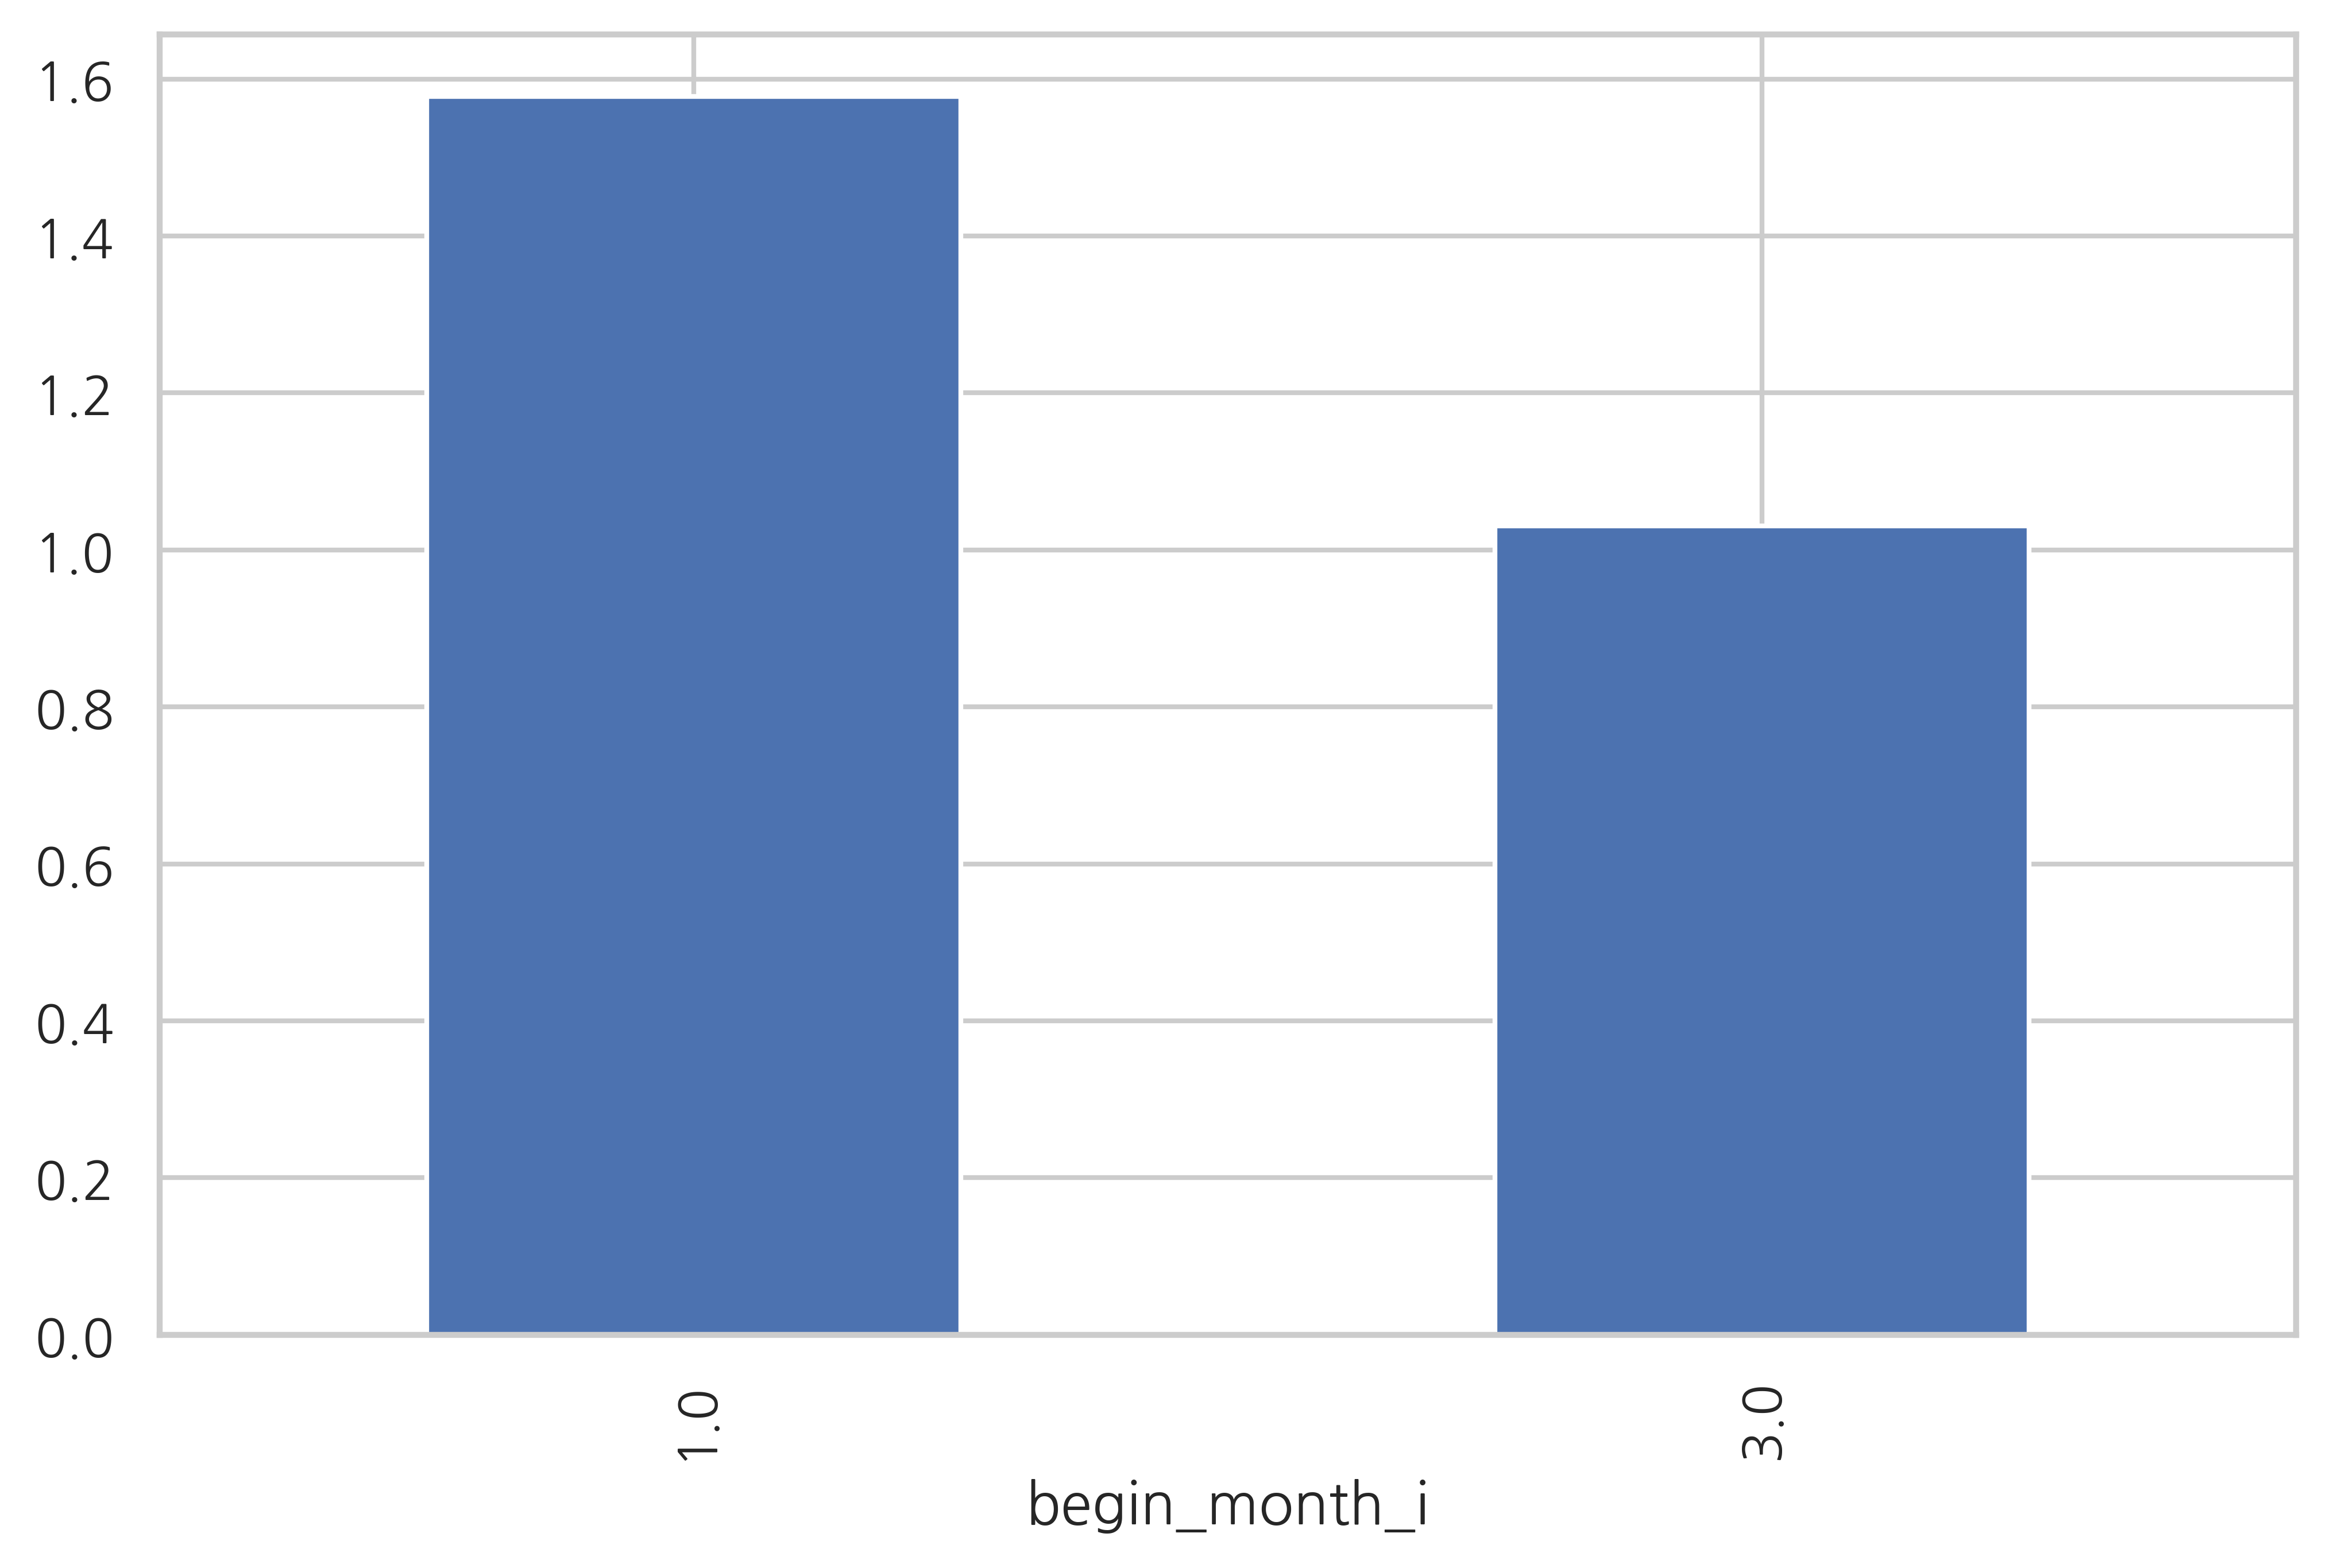

In [338]:
train_df.groupby('begin_month_i').mean()['credit'].plot(kind='bar')